In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

np.random.seed(1234)

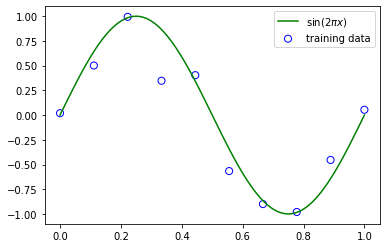

In [25]:
def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def func(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(func, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

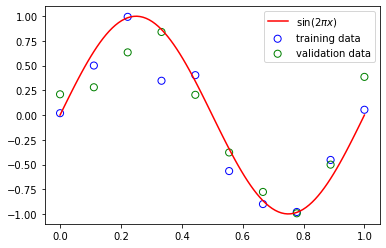

In [26]:
x_val, y_val = create_toy_data(func, 10, 0.25)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="none", edgecolor="g", s=50, label="validation data")
plt.plot(x_test, y_test, c="r", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

In [27]:
x_train = pd.DataFrame(np.stack((np.ones(len(x_train)), x_train), axis=1),
                       columns=['x0', 'x1'])
x_val = pd.DataFrame(np.stack((np.ones(len(x_val)), x_val), axis=1),
                       columns=['x0', 'x1'])

In [21]:
x_train

,x0,x1
0,1.0,0.000000
1,1.0,0.111111
2,1.0,0.222222
3,1.0,0.333333
4,1.0,0.444444
5,1.0,0.555556
6,1.0,0.666667
7,1.0,0.777778
8,1.0,0.888889
9,1.0,1.000000


In [56]:
class LinearRegression:
    def __init__(self, x_train, y_train, x_val, y_val):
        self.x_train = x_train
        self.y_train = y_train
        self.x_val = x_val
        self.y_val = y_val

    def cal_w(self):
        self.w = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(self.x_train), self.x_train)), np.transpose(self.x_train)), self.y_train)
        return self.w

    def cal_y_pred(self):
        self.y_pred = np.dot(self.x_train, self.w)
        return self.y_pred

    def cal_mse(self):
        mse_train = np.mean((self.y_pred - self.y_train)**2)
        mse_val = np.mean((self.y_pred - self.y_val)**2)
        return mse_train, mse_val


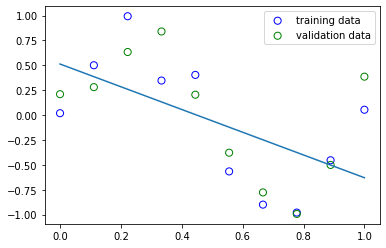

In [53]:
# Bac 1
df1 = LinearRegression(x_train, y_train, x_val, y_val)
w1 = df1.cal_w()
y1_pred = df1.cal_y_pred()

plt.plot(x_train.x1, y1_pred)
plt.scatter(x_train.x1, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val.x1, y_val, facecolor="none", edgecolor="g", s=50, label="validation data")
plt.legend()
plt.show()

In [58]:
mse_train, mse_val = df1.cal_mse()

print('MSE with training set: ' + str(mse_train))
print('MSE with validation set: ' + str(mse_val))

MSE with training set: 0.2459384643773385
MSE with validation set: 0.25451296190669304


In [64]:
# Bac 3
x3_train = x_train.copy()
x3_val = x_val.copy()

for i in range(2, 4):
    x3_train['x{}'.format(i)] = x3_train.x1**i
    x3_val['x{}'.format(i)] = x3_val.x1**i

x3_train
x3_val

,x0,x1,x2,x3
0,1.0,0.000000,0.000000,0.000000
1,1.0,0.111111,0.012346,0.001372
2,1.0,0.222222,0.049383,0.010974
3,1.0,0.333333,0.111111,0.037037
4,1.0,0.444444,0.197531,0.087791
5,1.0,0.555556,0.308642,0.171468
6,1.0,0.666667,0.444444,0.296296
7,1.0,0.777778,0.604938,0.470508
8,1.0,0.888889,0.790123,0.702332
9,1.0,1.000000,1.000000,1.000000


In [68]:
df3 = LinearRegression(x3_train, y_train, x3_val, y_val)
w3 = df3.cal_w()
y3_pred = df3.cal_y_pred()
w3

array([-1.52824841e-02,  8.80882501e+00, -2.76472225e+01,  1.90095829e+01])

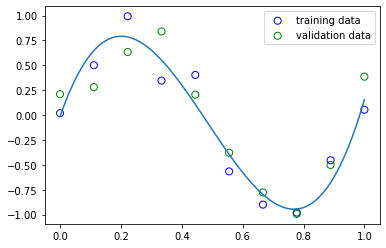

In [72]:
x3 = np.linspace(0, 1, 100)
y3 = w3[0] + w3[1]*x3 + w3[2]*x3**2 + w3[3]*x3**3

plt.plot(x3, y3)
plt.scatter(x_train.x1, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val.x1, y_val, facecolor="none", edgecolor="g", s=50, label="validation data")
plt.legend()
plt.show()


In [73]:
mse_train, mse_val = df3.cal_mse()

print('MSE with training set: ' + str(mse_train))
print('MSE with validation set: ' + str(mse_val))


MSE with training set: 0.029857778833271814
MSE with validation set: 0.03883634835058555


In [76]:
# Bac 9
x9_train = x3_train.copy()
x9_val = x3_val.copy()

for i in range(4, 10):
    x9_train['x{}'.format(i)] = x9_train.x1**i
    x9_val['x{}'.format(i)] = x9_val.x1**i

x9_train
# x9_val

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
1,1.0,0.111111,0.012346,0.001372,0.000152,0.000017,0.000002,2.090752e-07,2.323057e-08,2.581175e-09
2,1.0,0.222222,0.049383,0.010974,0.002439,0.000542,0.000120,2.676162e-05,5.947027e-06,1.321561e-06
3,1.0,0.333333,0.111111,0.037037,0.012346,0.004115,0.001372,4.572474e-04,1.524158e-04,5.080526e-05
4,1.0,0.444444,0.197531,0.087791,0.039018,0.017342,0.007707,3.425487e-03,1.522439e-03,6.766395e-04
5,1.0,0.555556,0.308642,0.171468,0.095260,0.052922,0.029401,1.633400e-02,9.074443e-03,5.041357e-03
6,1.0,0.666667,0.444444,0.296296,0.197531,0.131687,0.087791,5.852766e-02,3.901844e-02,2.601229e-02
7,1.0,0.777778,0.604938,0.470508,0.365950,0.284628,0.221377,1.721824e-01,1.339196e-01,1.041597e-01
8,1.0,0.888889,0.790123,0.702332,0.624295,0.554929,0.493270,4.384624e-01,3.897443e-01,3.464394e-01
9,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00


In [77]:
df9 = LinearRegression(x9_train, y_train, x9_val, y_val)
w9 = df9.cal_w()
y9_pred = df9.cal_y_pred()



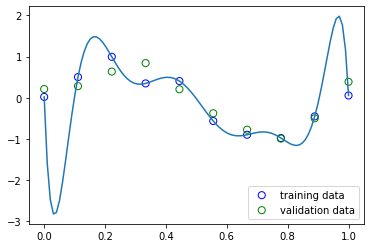

In [79]:
x9 = np.linspace(0, 1, 100)
# y9 = w9[0] + w9[1]*x9 + w9[2]*x9**2 + w9[3]*x9**3
y9 = w9[0]
for i in range(1, 10):
    y9 += w9[i]*x9**i

plt.plot(x9, y9)
plt.scatter(x_train.x1, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val.x1, y_val, facecolor="none", edgecolor="g", s=50, label="validation data")
plt.legend()
plt.show()


In [80]:
mse_train, mse_val = df9.cal_mse()

print('MSE with training set: ' + str(mse_train))
print('MSE with validation set: ' + str(mse_val))

MSE with training set: 5.853265143957683e-08
MSE with validation set: 0.06602497527287186


In [82]:
# Add 100 observations
x100_train, y100_train = create_toy_data(func, 109, 0.25)
x100_val, y100_val = create_toy_data(func, 109, 0.25)

x100_train = pd.DataFrame(np.stack((np.ones(len(x100_train)), x100_train), axis=1),
                       columns=['x0', 'x1'])
x100_val = pd.DataFrame(np.stack((np.ones(len(x100_val)), x100_val), axis=1),
                       columns=['x0', 'x1'])

for i in range(2, 10):
    x100_train['x{}'.format(i)] = x100_train.x1**i
    x100_val['x{}'.format(i)] = x100_val.x1**i

x100_train


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,1.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,1.0,0.009259,0.000086,7.938322e-07,7.350299e-09,6.805832e-11,6.301696e-13,5.834904e-15,5.402689e-17,5.002490e-19
2,1.0,0.018519,0.000343,6.350658e-06,1.176048e-07,2.177866e-09,4.033086e-11,7.468677e-13,1.383088e-14,2.561275e-16
3,1.0,0.027778,0.000772,2.143347e-05,5.953742e-07,1.653817e-08,4.593937e-10,1.276093e-11,3.544704e-13,9.846400e-15
4,1.0,0.037037,0.001372,5.080526e-05,1.881676e-06,6.969172e-08,2.581175e-09,9.559907e-11,3.540706e-12,1.311373e-13
...,...,...,...,...,...,...,...,...,...,...
104,1.0,0.962963,0.927298,8.929533e-01,8.598810e-01,8.280335e-01,7.973656e-01,7.678336e-01,7.393953e-01,7.120103e-01
105,1.0,0.972222,0.945216,9.189600e-01,8.934334e-01,8.686158e-01,8.444876e-01,8.210296e-01,7.982232e-01,7.760503e-01
106,1.0,0.981481,0.963306,9.454669e-01,9.279583e-01,9.107738e-01,8.939077e-01,8.773538e-01,8.611065e-01,8.451601e-01
107,1.0,0.990741,0.981567,9.724786e-01,9.634742e-01,9.545531e-01,9.457147e-01,9.369581e-01,9.282825e-01,9.196873e-01


In [84]:
df100 = LinearRegression(x100_train, y100_train, x100_val, y100_val)
w100 = df100.cal_w()
y100_pred = df100.cal_y_pred()


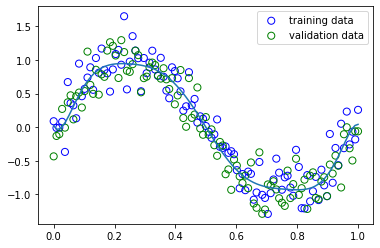

In [85]:
x100 = np.linspace(0, 1, 100)
# y9 = w9[0] + w9[1]*x9 + w9[2]*x9**2 + w9[3]*x9**3
y100 = w9[0]
for i in range(1, 10):
    y100 += w100[i]*x100**i

plt.plot(x100, y100)
plt.scatter(x100_train.x1, y100_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x100_val.x1, y100_val, facecolor="none", edgecolor="g", s=50, label="validation data")
plt.legend()
plt.show()



In [86]:
mse_train, mse_val = df100.cal_mse()

print('MSE with training set: ' + str(mse_train))
print('MSE with validation set: ' + str(mse_val))


MSE with training set: 0.052795573246780476
MSE with validation set: 0.054149743695452474


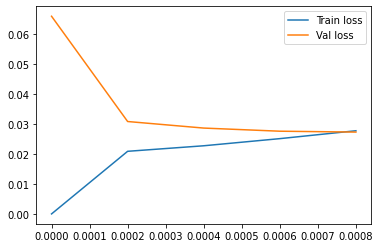

In [150]:
# Ridge regression
mse_train = {}
mse_val = {}

for l in np.arange(0, 0.001, 0.0002):
    w9 = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(x9_train), x9_train) + l*np.identity(x9_train.shape[0])), np.transpose(x9_train)), y_train)
    y9_pred = np.dot(x9_train, w9)
    mse_train[l] = np.mean((y9_pred - y_train)**2)
    mse_val[l] = np.mean((y9_pred - y_val)**2)

plt.plot(list(mse_train.keys()), list(mse_train.values()), label='Train loss')
plt.plot(list(mse_val.keys()), list(mse_val.values()), label='Val loss')
plt.legend()
plt.show()



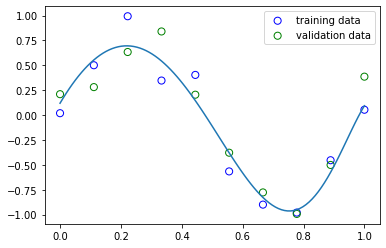

In [151]:
w9 = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(x9_train), x9_train) + 0.0007*np.identity(x9_train.shape[0])), np.transpose(x9_train)), y_train)
y9_pred = np.dot(x9_train, w9)

x9 = np.linspace(0, 1, 100)
# y9 = w9[0] + w9[1]*x9 + w9[2]*x9**2 + w9[3]*x9**3
y9 = w9[0]
for i in range(1, 10):
    y9 += w9[i]*x9**i

plt.plot(x9, y9)
plt.scatter(x_train.x1, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val.x1, y_val, facecolor="none", edgecolor="g", s=50, label="validation data")
plt.legend()
plt.show()

In [152]:
mse_train = np.mean((y9_pred - y_train)**2)
mse_val = np.mean((y9_pred - y_val)**2)

print('MSE train ' + str(mse_train))
print('MSE val ' + str(mse_val))

MSE train 0.026440546127383287
MSE val 0.027404308333880145
